# Forest Fire Classifier using ANN

In this project, we will be classifying different levels of forest fires, through artificial neural network in deep learning.

## Data Description

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

## Data Loading

In [72]:
import pandas as pd

In [73]:
df = pd.read_csv("forestfires.csv")

In [74]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [75]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


__Exploring Data Label__

In [78]:
(df["area"] == 0).sum()

247

In [79]:
(df["area"] > 0).sum()

270

## Data Visualization

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [81]:
plt.style.use('seaborn')

In [82]:
sns.set(rc={"figure.facecolor" : "white"})

__Analyze DATA Distribution through Histogram and Boxplot__

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["month"] = le.fit_transform(df["month"])
df["day"] = le.fit_transform(df["day"])

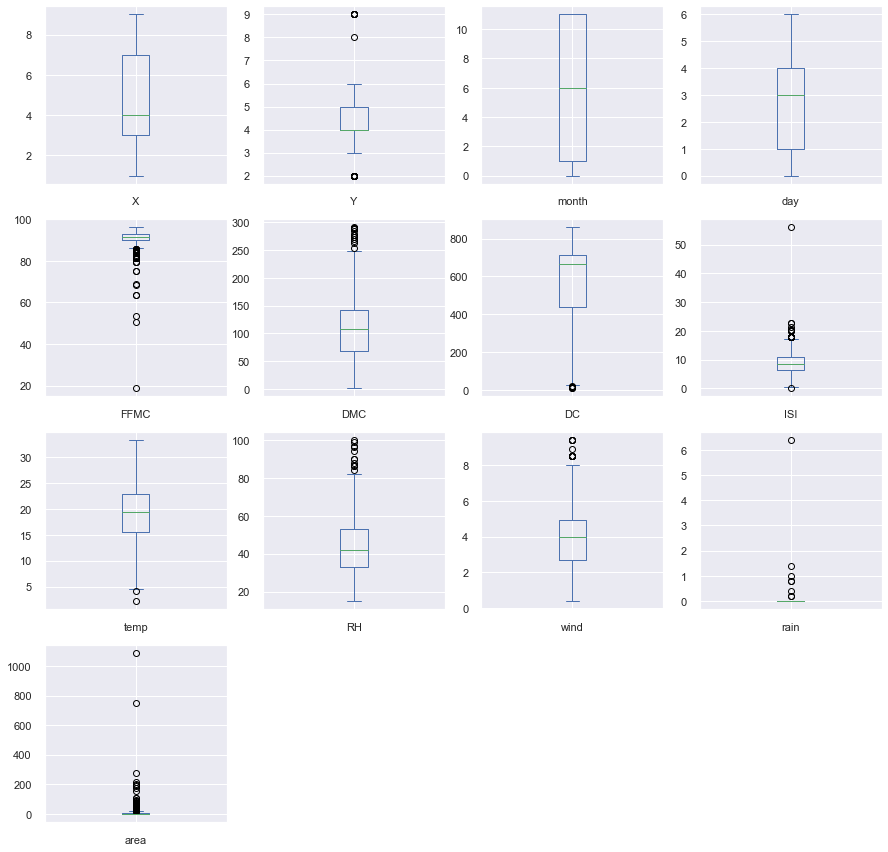

In [84]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(15, 15))
plt.show()

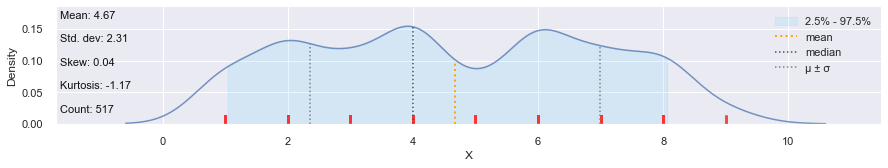

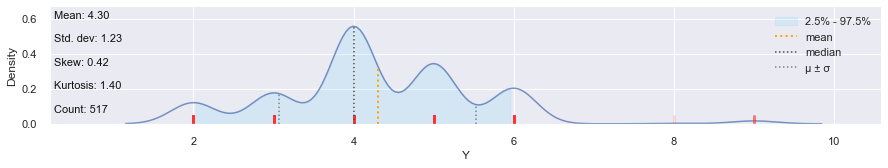

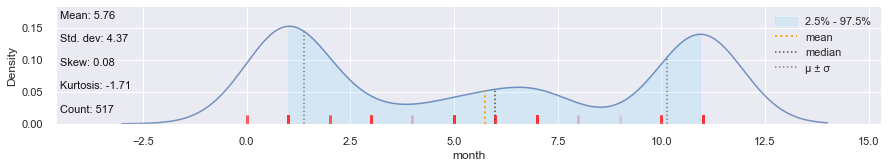

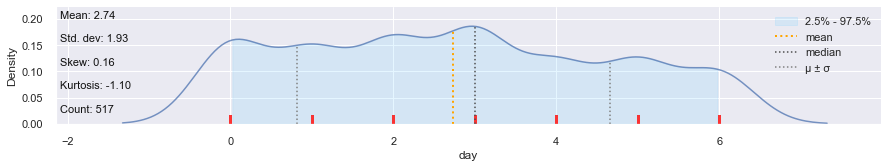

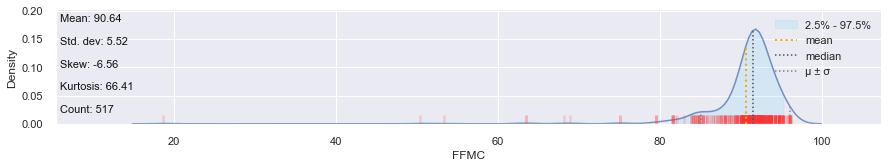

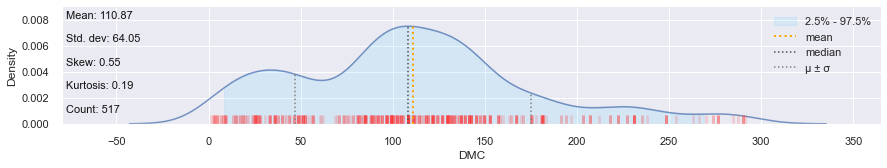

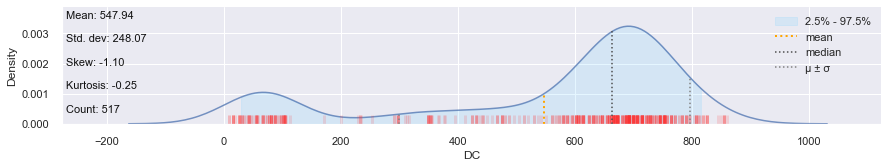

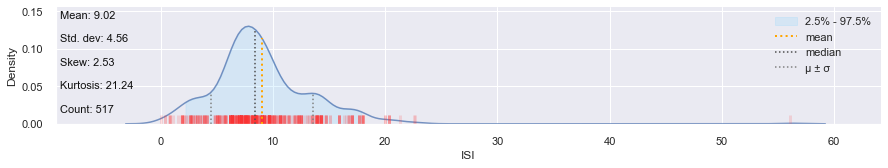

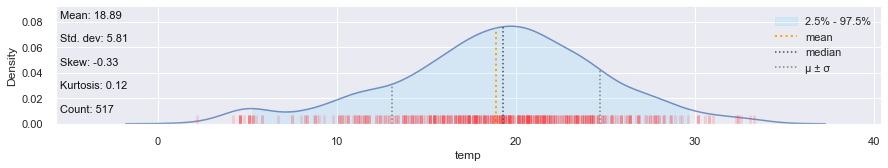

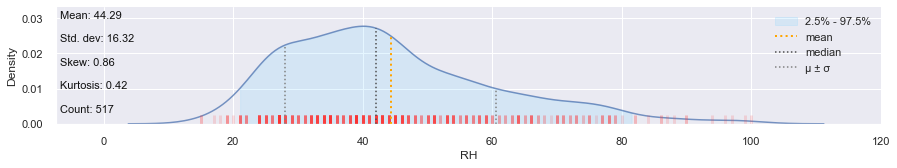

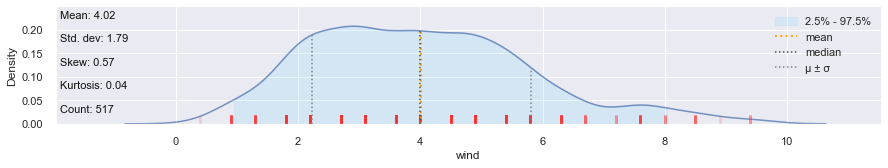

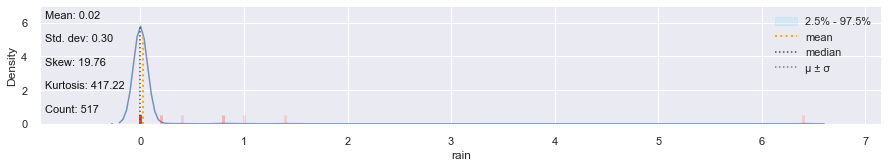

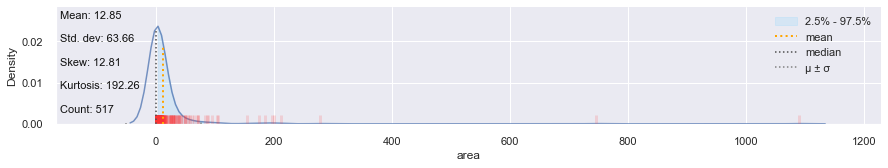

In [85]:
klib.dist_plot(df)
plt.show()

*We can see that the target (area) is extremely imbalanced, the mean is 12.85, where most of the data is concentrated on, but the data ranges till around 1100.*

This will make solving this problem through regression very poor, if not pre-processing the data through various steps properly, especially normalization. That is why to make things simpler, we will take the classification approach.

## Data Pre-Processing

Steps Include:
1. Group Label to some Classes
2. Define Features and Label
3. Split Data
4. Feature Scaling

**Group Label to some Classes**

In [86]:
for i in range(len(df["area"])):
    if df["area"][i] > 0.0:
        df["area"][i] = 1

C:\Users\Louis J. Zhang\AppData\Local\Temp\ipykernel_5088\2471338765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area"][i] = 1


In [87]:
df["area"] = df["area"].astype(int)

In [88]:
df["area"].value_counts()

1    270
0    247
Name: area, dtype: int64

**Define Features and Label**

In [89]:
features = df.drop("area", axis=1)
label = df["area"]

**Split Data**

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2,
                                                    random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(413, 12)
(104, 12)
(413,)
(104,)


**Feature Scaling**

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Data Modeling and Evaluation

### ML Approach

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
print("training accuracy", rfc.score(x_train, y_train))
print("testing accuracy", rfc.score(x_test, y_test))

training accuracy 0.9975786924939467
testing accuracy 0.5384615384615384


In [96]:
feature_importances = pd.Series(data=rfc.feature_importances_, 
                                index=features.columns)
feature_importances.sort_values(inplace=True)

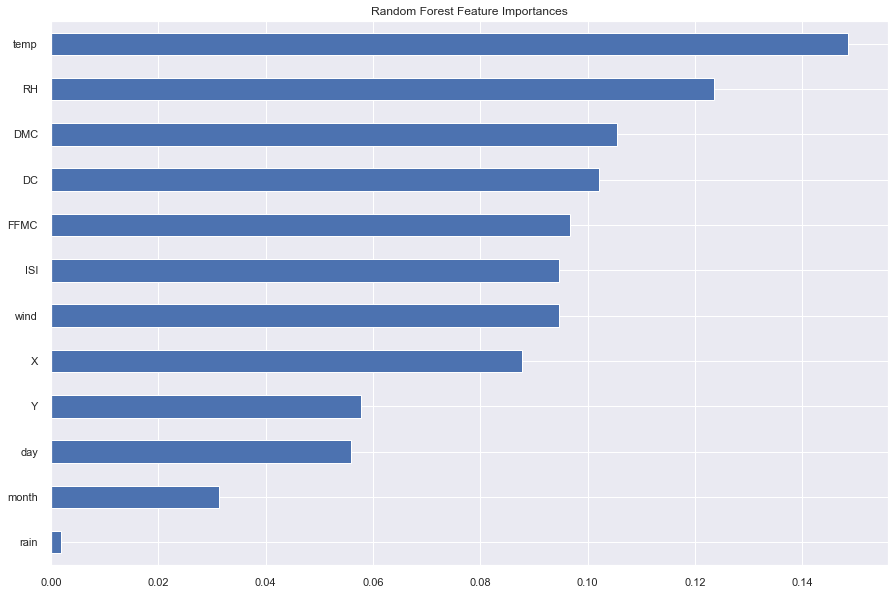

In [97]:
plt.figure(figsize=(15, 10))
feature_importances.plot(kind="barh")
plt.title('Random Forest Feature Importances')
plt.show()

In [98]:
features = df.drop(["area", "rain"], axis=1)
label = df["area"]

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2,
                                                    random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)
print("training accuracy", rfc.score(x_train, y_train))
print("testing accuracy", rfc.score(x_test, y_test))

training accuracy 0.9975786924939467
testing accuracy 0.5192307692307693


### Feature Extraction (PCA)

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [101]:
explained_variance = pca.explained_variance_ratio_
var_per_feat = pd.Series(data=explained_variance)
var_per_feat.sort_values(inplace=True, ascending=False)
var_per_feat

0     0.260612
1     0.142658
2     0.127413
3     0.119486
4     0.092341
5     0.077267
6     0.058519
7     0.043850
8     0.041092
9     0.019243
10    0.017520
dtype: float64

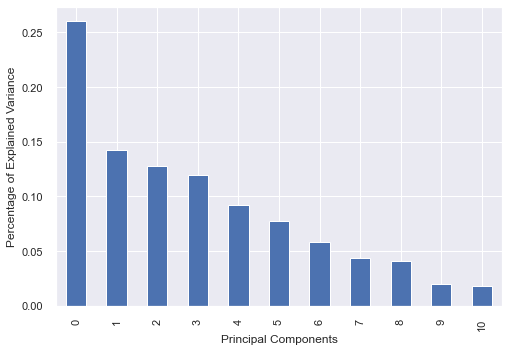

In [102]:
var_per_feat.plot(kind="bar")
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.show()

__Retrain__

In [103]:
features = df.drop(["area", "rain"], axis=1)
label = df["area"]

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2,
                                                    random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [104]:
pca = PCA(n_components = 3)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [144]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print("training accuracy", rfc.score(x_train, y_train))
print("testing accuracy", rfc.score(x_test, y_test))

training accuracy 0.9975786924939467
testing accuracy 0.6057692307692307


### DL Approach (Basic HyperParameters)

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [107]:
ann = Sequential()
ann.add(Dense(input_dim=3, units=10, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(loss="binary_crossentropy", optimizer="adam", 
            metrics=["accuracy"])

In [108]:
history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 20ms/step - loss: 0.8143 - accuracy: 0.4818 - val_loss: 0.7431 - val_accuracy: 0.5192
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8025 - accuracy: 0.4891 - val_loss: 0.7349 - val_accuracy: 0.5096
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7677 - accuracy: 0.5085 - val_loss: 0.7280 - val_accuracy: 0.5000
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7550 - accuracy: 0.4915 - val_loss: 0.7226 - val_accuracy: 0.4712
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7450 - accuracy: 0.4843 - val_loss: 0.7181 - val_accuracy: 0.4615
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7471 - accuracy: 0.4939 - val_loss: 0.7154 - val_accuracy: 0.4327
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7169 - accuracy: 0.5303 - val_loss: 0.7124 - val_accuracy: 0.4327
Epoch 8/200


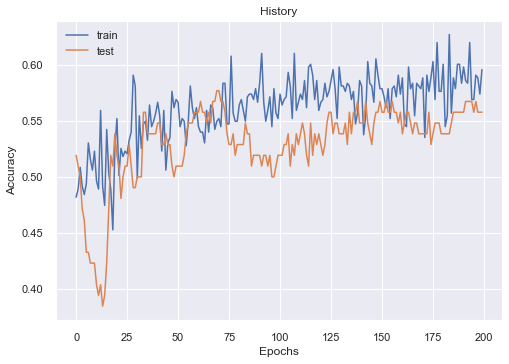

In [109]:
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="test")
plt.title("History")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [110]:
_, train_acc = ann.evaluate(x_train, y_train, verbose=0)
_, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.605, Valid: 0.558


### DL Approach (Experimenting with HyperParameters)

#### Epochs

In [111]:
epoch_opts = [10, 20, 50, 100, 200, 500, 1200]

In [112]:
def epoch_exp(epoch_opts):
    for i in epoch_opts:
        ann = Sequential()
        ann.add(Dense(input_dim=3, units=10, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=6, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=1, activation="sigmoid"))
        ann.compile(loss="binary_crossentropy", optimizer="adam", 
                    metrics=["accuracy"])
        
        history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=i, verbose=0)
        
        _, train_acc = ann.evaluate(x_train, y_train, verbose=0)
        _, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
        print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

        plt.plot(history.history['loss'], label="train")
        plt.plot(history.history['val_loss'], label="test")
        plt.title("Epoch Experiments")
        plt.ylabel("Loss")
        plt.xlabel(f"{i} Epochs")
        plt.legend()
        plt.show()


Train ACC: 0.494, Valid ACC: 0.567


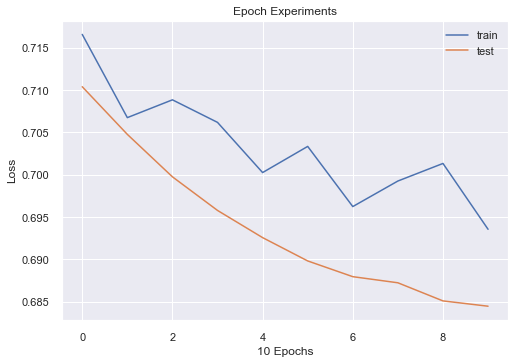

Train ACC: 0.535, Valid ACC: 0.558


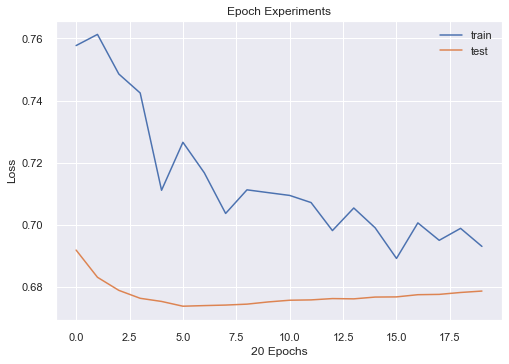

Train ACC: 0.562, Valid ACC: 0.558


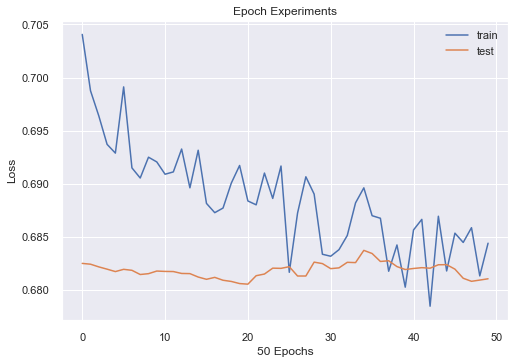

Train ACC: 0.576, Valid ACC: 0.596


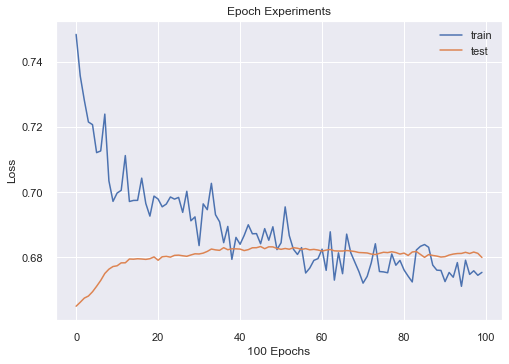

Train ACC: 0.610, Valid ACC: 0.567


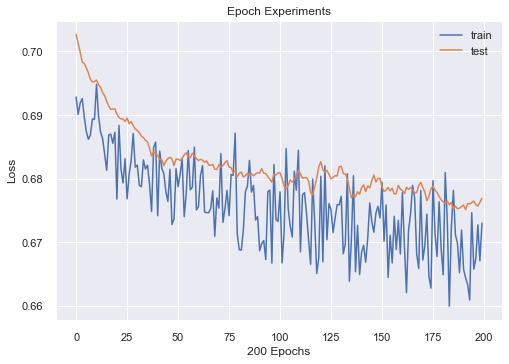

Train ACC: 0.605, Valid ACC: 0.587


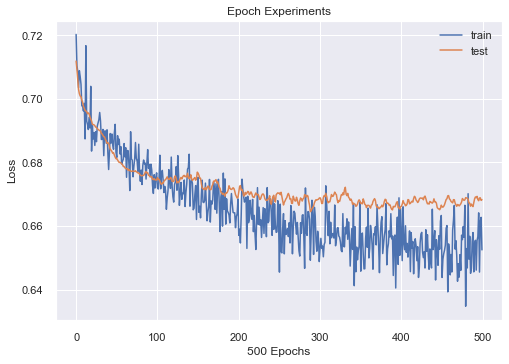

Train ACC: 0.659, Valid ACC: 0.644


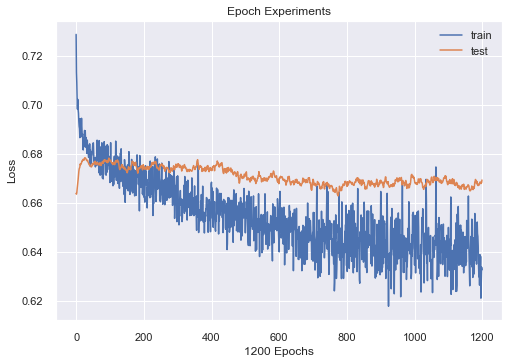

In [113]:
epoch_exp(epoch_opts)

100 epochs is the minimum to see minimal results and overall changes.

#### Batch Size

In [114]:
bs_opts = [8, 16, 32, 64, 128]

In [115]:
def bs_exp(bs_opts):
    for i in bs_opts:
        ann = Sequential()
        ann.add(Dense(input_dim=3, units=10, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=6, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=1, activation="sigmoid"))
        ann.compile(loss="binary_crossentropy", optimizer="adam", 
                    metrics=["accuracy"])
        
        history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=i, epochs=100, verbose=0)
        
        _, train_acc = ann.evaluate(x_train, y_train, verbose=0)
        _, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
        print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

        plt.plot(history.history['loss'], label="train")
        plt.plot(history.history['val_loss'], label="test")
        plt.title("Batch Size Experiments")
        plt.ylabel("Loss")
        plt.xlabel(f"{i} Batch Size")
        plt.legend()
        plt.show()


Train ACC: 0.627, Valid ACC: 0.538


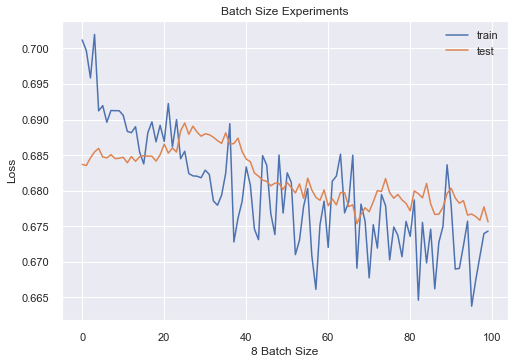

Train ACC: 0.593, Valid ACC: 0.490


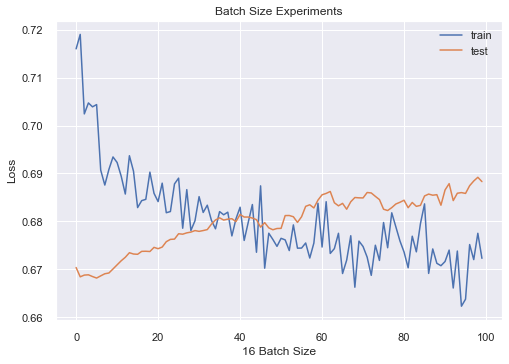

Train ACC: 0.584, Valid ACC: 0.529


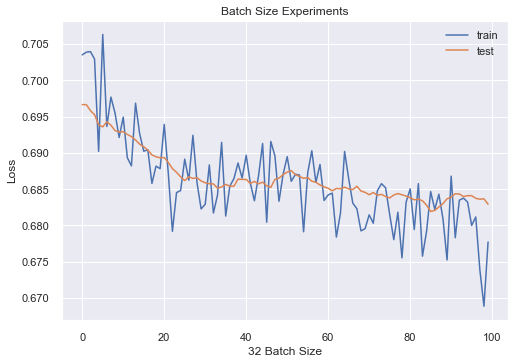

Train ACC: 0.588, Valid ACC: 0.529


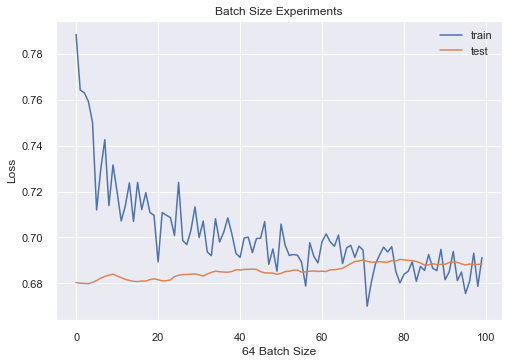

Train ACC: 0.596, Valid ACC: 0.490


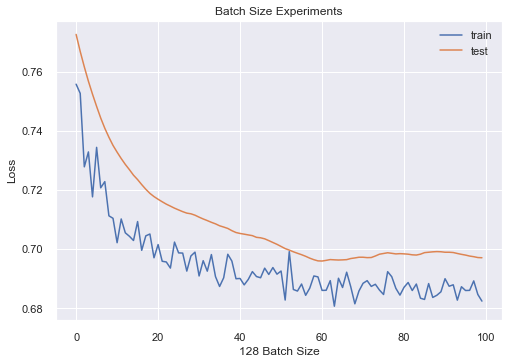

In [116]:
bs_exp(bs_opts)

Results are similar for every batch size. So let's just use default which is 32.

#### Activation & Loss Function

__Binary Classification__

Train ACC: 0.593, Valid ACC: 0.529


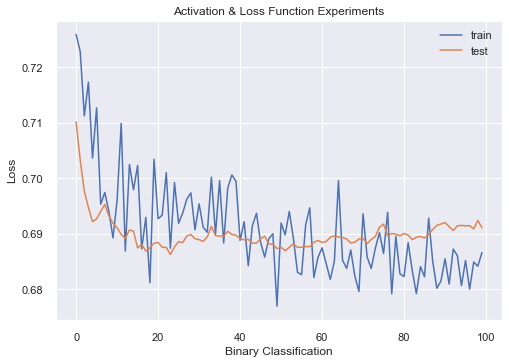

In [117]:
ann = Sequential()
ann.add(Dense(input_dim=3, units=10, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=1, activation="sigmoid"))
ann.compile(loss="binary_crossentropy", optimizer="adam", 
metrics=["accuracy"])

history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
batch_size=32, epochs=100, verbose=0)

_, train_acc = ann.evaluate(x_train, y_train, verbose=0)
_, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title("Activation & Loss Function Experiments")
plt.ylabel("Loss")
plt.xlabel("Binary Classification")
plt.legend()
plt.show()


__Multi Classification__

Train ACC: 0.576, Valid ACC: 0.567


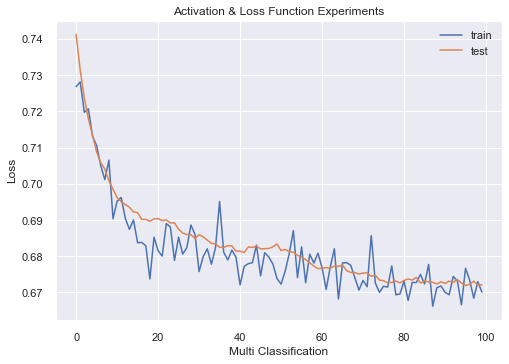

In [118]:
ann = Sequential()
ann.add(Dense(input_dim=3, units=10, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=2, activation="softmax"))
ann.compile(loss="sparse_categorical_crossentropy", optimizer="adam", 
metrics=["accuracy"])

history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
batch_size=32, epochs=100, verbose=0)

_, train_acc = ann.evaluate(x_train, y_train, verbose=0)
_, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title("Activation & Loss Function Experiments")
plt.ylabel("Loss")
plt.xlabel("Multi Classification")
plt.legend()
plt.show()


There aren't any major differences between these 2 approaches, both performs similarly.

#### Optimizer

In [119]:
optimizers = ["SGD", "RMSprop", "Adam", "Adadelta", "Adagrad", "Adamax",
                "Nadam", "Ftrl"]

In [120]:
def opt_exp(optimizers):
    for i in optimizers:
        ann = Sequential()
        ann.add(Dense(input_dim=3, units=10, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=6, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=1, activation="sigmoid"))
        ann.compile(loss="binary_crossentropy", optimizer=i, 
                    metrics=["accuracy"])
        
        history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=100, verbose=0)
        
        _, train_acc = ann.evaluate(x_train, y_train, verbose=0)
        _, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
        print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

        plt.plot(history.history['loss'], label="train")
        plt.plot(history.history['val_loss'], label="test")
        plt.title("Optimizer Experiments")
        plt.ylabel("Loss")
        plt.xlabel(f"{i} Optimizer")
        plt.legend()
        plt.show()


Train ACC: 0.535, Valid ACC: 0.587


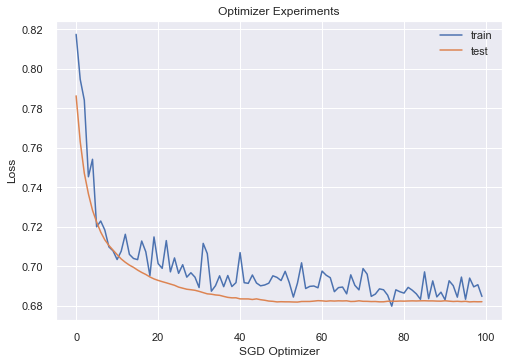

Train ACC: 0.596, Valid ACC: 0.538


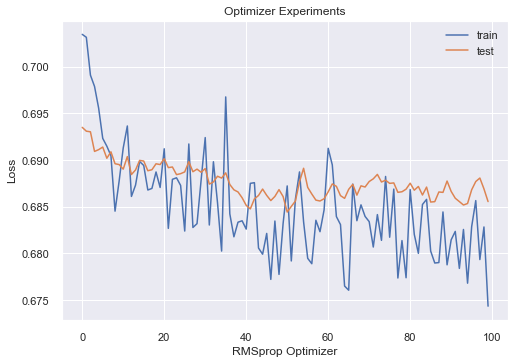

Train ACC: 0.581, Valid ACC: 0.538


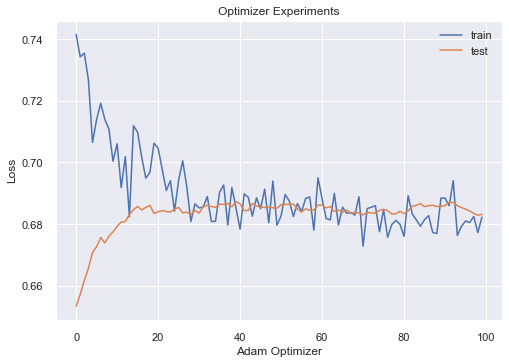

Train ACC: 0.472, Valid ACC: 0.394


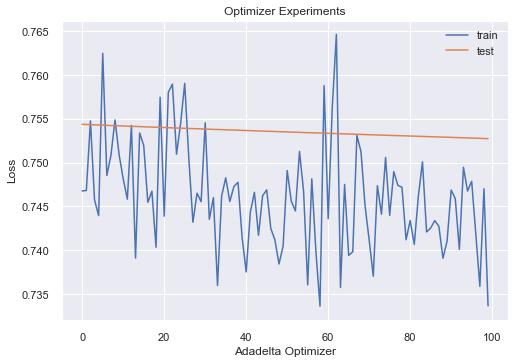

Train ACC: 0.499, Valid ACC: 0.529


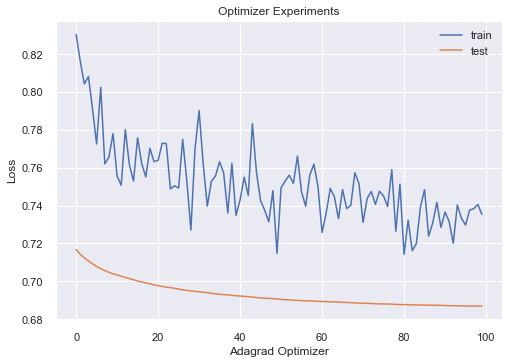

Train ACC: 0.588, Valid ACC: 0.481


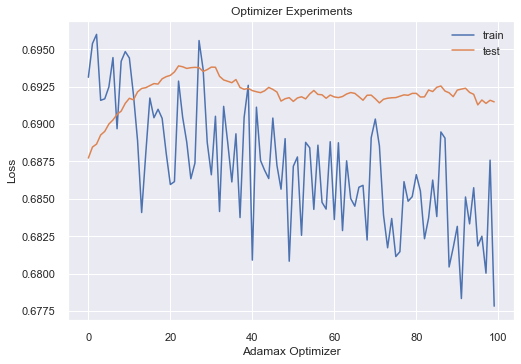

Train ACC: 0.569, Valid ACC: 0.558


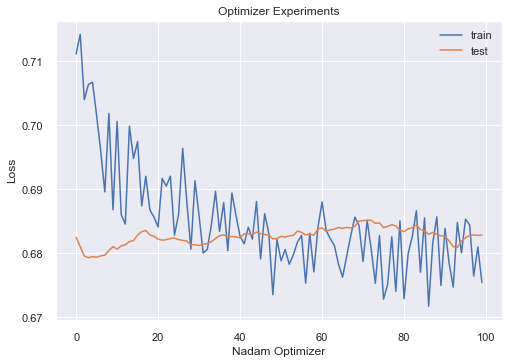

Train ACC: 0.508, Valid ACC: 0.577


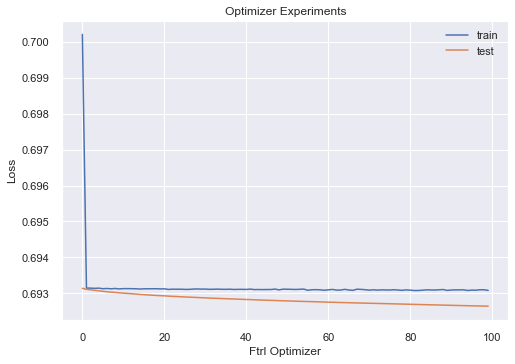

In [121]:
opt_exp(optimizers)

All optimizers produce similar results, and Adadelta optimizer performs the worst.

#### Learning Rate

We will use SGD optimizer to experiment learning rate.

In [122]:
from keras.optimizers import SGD

In [123]:
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

In [124]:
def lr_exp(learning_rates):
    for i in learning_rates:
        ann = Sequential()
        ann.add(Dense(input_dim=3, units=10, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=6, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=1, activation="sigmoid"))

        opt = SGD(learning_rate=i)
        ann.compile(loss="binary_crossentropy", optimizer=opt, 
                    metrics=["accuracy"])
        
        history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=100, verbose=0)
        
        _, train_acc = ann.evaluate(x_train, y_train, verbose=0)
        _, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
        print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

        plt.plot(history.history['loss'], label="train")
        plt.plot(history.history['val_loss'], label="test")
        plt.title("Learning Rate Experiments")
        plt.ylabel("Loss")
        plt.xlabel(f"{i} Learning Rate")
        plt.legend()
        plt.show()


Train ACC: 0.579, Valid ACC: 0.663


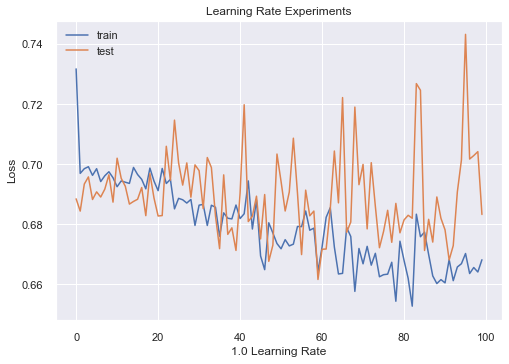

Train ACC: 0.615, Valid ACC: 0.606


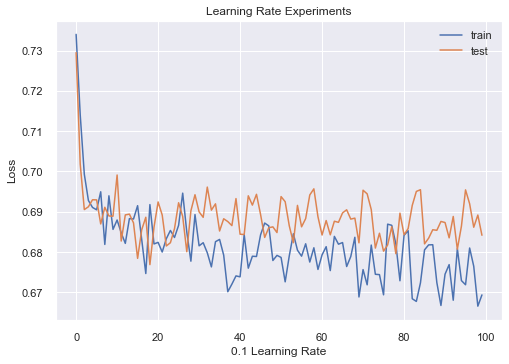

Train ACC: 0.545, Valid ACC: 0.587


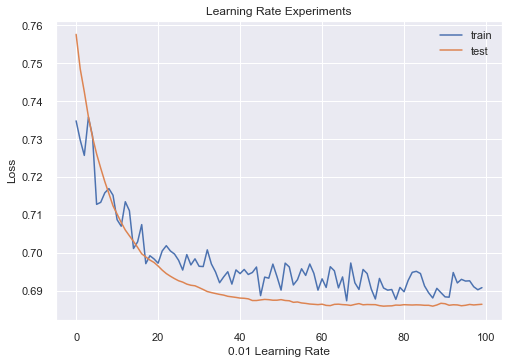

Train ACC: 0.525, Valid ACC: 0.413


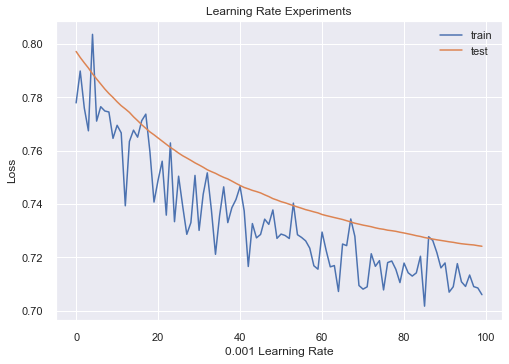

Train ACC: 0.484, Valid ACC: 0.413


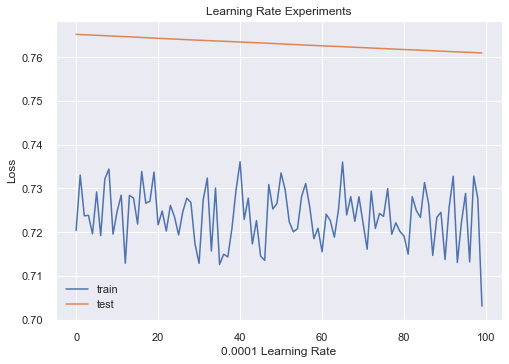

Train ACC: 0.528, Valid ACC: 0.606


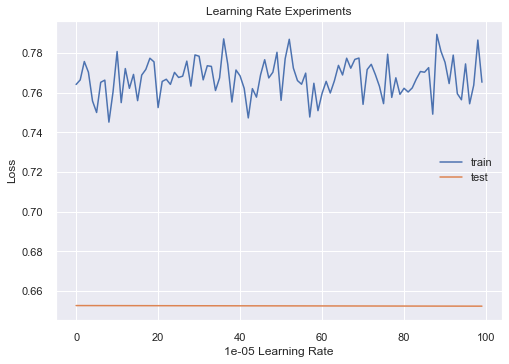

Train ACC: 0.494, Valid ACC: 0.587


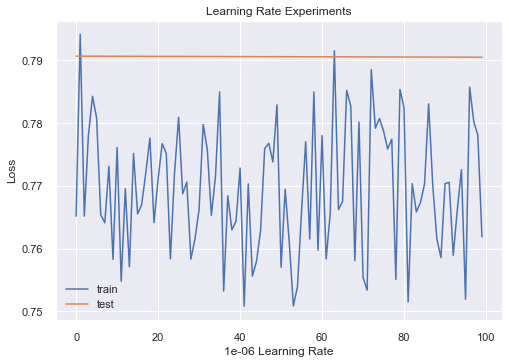

Train ACC: 0.535, Valid ACC: 0.471


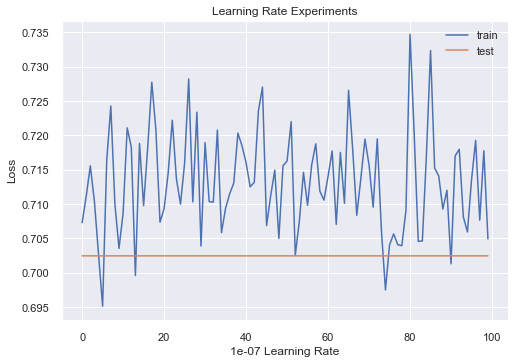

In [125]:
lr_exp(learning_rates)

The best learning rate is 0.01, because the graph is the most stable and not fluctuating, it has the best overall trend and shape.

#### Momentum

In [126]:
momentums = [0.0, 0.5, 0.8, 0.9, 0.99, 1.0]

In [127]:
def momentum_exp(momentums):
    for i in momentums:
        ann = Sequential()
        ann.add(Dense(input_dim=3, units=10, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=6, activation="relu"))
        ann.add(Dropout(rate=0.1))
        ann.add(Dense(units=1, activation="sigmoid"))

        opt = SGD(learning_rate=0.01, momentum=i)
        ann.compile(loss="binary_crossentropy", optimizer=opt, 
                    metrics=["accuracy"])
        
        history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=100, verbose=0)
        
        _, train_acc = ann.evaluate(x_train, y_train, verbose=0)
        _, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
        print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

        plt.plot(history.history['loss'], label="train")
        plt.plot(history.history['val_loss'], label="test")
        plt.title("Momentum Experiments")
        plt.ylabel("Loss")
        plt.xlabel(f"{i} Momentum")
        plt.legend()
        plt.show()


Train ACC: 0.567, Valid ACC: 0.567


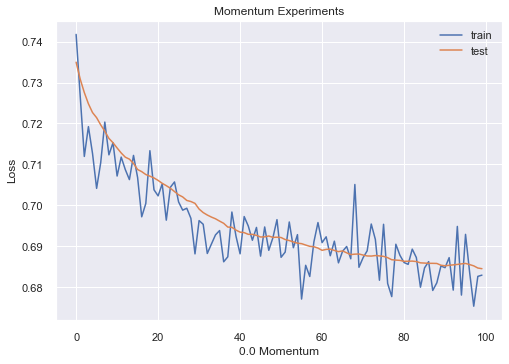

Train ACC: 0.591, Valid ACC: 0.558


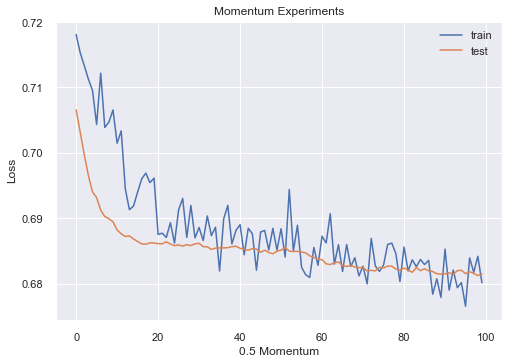

Train ACC: 0.562, Valid ACC: 0.510


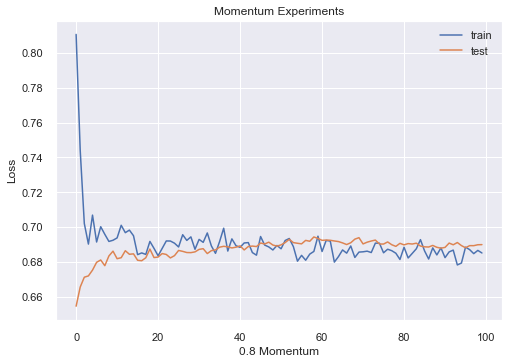

Train ACC: 0.576, Valid ACC: 0.510


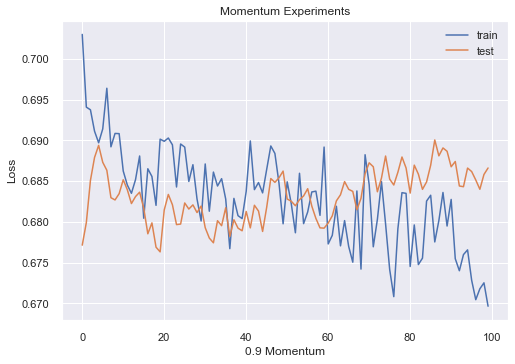

Train ACC: 0.620, Valid ACC: 0.548


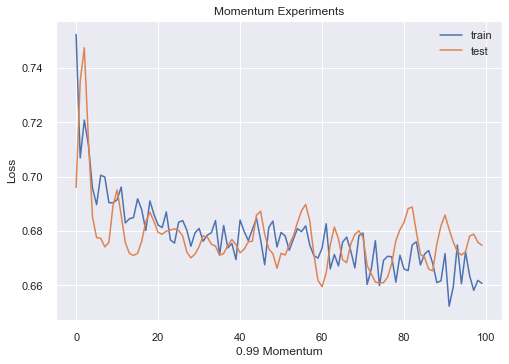

Train ACC: 0.530, Valid ACC: 0.442


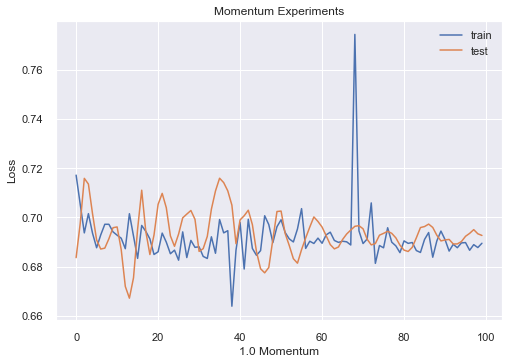

In [128]:
momentum_exp(momentums)

The best momentum is 0.0, because the graph is the most stable and not fluctuating, it has the best overall trend and shape.

## Final Conclusion

In [129]:
ann = Sequential()
ann.add(Dense(input_dim=3, units=10, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=6, activation="relu"))
ann.add(Dropout(rate=0.1))
ann.add(Dense(units=1, activation="sigmoid"))

opt = SGD(learning_rate=0.01, momentum=0.0)
ann.compile(loss="binary_crossentropy", optimizer=opt, 
            metrics=["accuracy"])

In [130]:
ann.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_225 (Dense)           (None, 10)                40        
                                                                 
 dropout_150 (Dropout)       (None, 10)                0         
                                                                 
 dense_226 (Dense)           (None, 6)                 66        
                                                                 
 dropout_151 (Dropout)       (None, 6)                 0         
                                                                 
 dense_227 (Dense)           (None, 1)                 7         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [131]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [132]:
es = EarlyStopping(monitor="val_loss", mode="min", patience=50, verbose=1)
mc = ModelCheckpoint(filepath="annmodel.h5", monitor="val_accuracy", 
                    mode="max", save_best_only=True, verbose=1)

In [133]:
history = ann.fit(x_train, y_train, validation_data=(x_test, y_test),
                    batch_size=32, epochs=1000, callbacks=[es, mc], verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.47115, saving model to annmodel.h5

Epoch 2: val_accuracy did not improve from 0.47115

Epoch 3: val_accuracy did not improve from 0.47115

Epoch 4: val_accuracy did not improve from 0.47115

Epoch 5: val_accuracy did not improve from 0.47115

Epoch 6: val_accuracy did not improve from 0.47115

Epoch 7: val_accuracy did not improve from 0.47115

Epoch 8: val_accuracy did not improve from 0.47115

Epoch 9: val_accuracy improved from 0.47115 to 0.48077, saving model to annmodel.h5

Epoch 10: val_accuracy did not improve from 0.48077

Epoch 11: val_accuracy improved from 0.48077 to 0.50962, saving model to annmodel.h5

Epoch 12: val_accuracy improved from 0.50962 to 0.51923, saving model to annmodel.h5

Epoch 13: val_accuracy did not improve from 0.51923

Epoch 14: val_accuracy did not improve from 0.51923

Epoch 15: val_accuracy improved from 0.51923 to 0.52885, saving model to annmodel.h5

Epoch 16: val_accuracy improved from 0.52885 to 0.5

In [134]:
_, train_acc = ann.evaluate(x_train, y_train, verbose=0)
_, valid_acc = ann.evaluate(x_test, y_test, verbose=0)
print('Train ACC: %.3f, Valid ACC: %.3f' % (train_acc, valid_acc))

Train ACC: 0.584, Valid ACC: 0.529


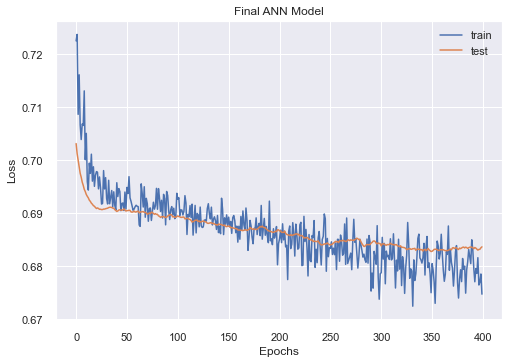

In [135]:
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label="test")
plt.title("Final ANN Model")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [136]:
import numpy as np

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
y_pred = ann.predict(x_test)
y_pred = y_pred >= 0.5

4/4 [==============================] - 0s 2ms/step


__Creating Confusion Matrix__

In [139]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 28],
       [21, 39]], dtype=int64)

In [140]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(np.round(accuracy*100, 2), "%")

52.88 %


To present this confusion matrix in a heatmap, we can use the following code:

In [141]:
group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

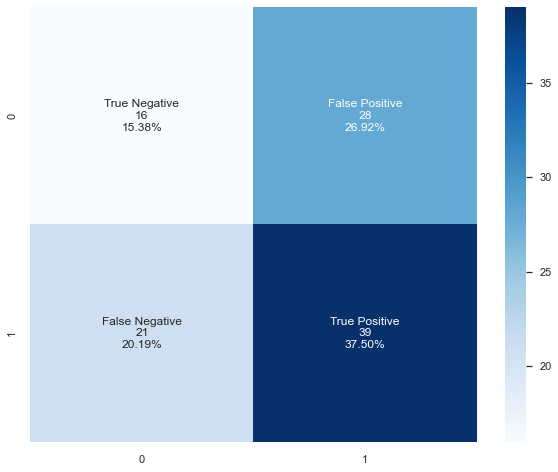

In [142]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()

In conclusion, our articial neural network classifier is not that good in predicting forest fires. There are lots of misclassifications. Through lots of different experiments with the pre-processing, neural network architecture, hyperparameters etc, it is found that the problem is not caused by our model algorithm but instead caused by the dataset itself, which is: noisy, imbalanced, have quite many outliers; features have very low correlation with the target variable. 